In [1]:
# Run the following in the terminal:
# uv run python -m sglang.launch_server --model-path ./models/llama_32_8b_merged

In [6]:
# launch server
# python -m sglang.launch_server --model LxzGordon/URM-LLaMa-3.1-8B --is-embedding

import requests

url = "http://127.0.0.1:30000"


def run_inference_sglang(prompts: list[str]) -> list[float]:
    json_data = {
        "conv": prompts,
    }
    response = requests.post(url + "/judge", json=json_data).json()

    return [x["embedding"][0] for x in response]


sample_prompts = [
    "random prompt 1",
    "random prompt 2",
]

run_inference_sglang(sample_prompts)

[-7.40625, -6.90625]

In [7]:
import polars as pl

inputs = pl.read_parquet("./data/sample_comments_new_prompt.parquet")

small_sample = inputs.sort(by="prompt", descending=False).head(10000)

small_sample

id,type,by,time,title,text,url,score,parent,top_level_parent,descendants,kids,deleted,dead,siblings_count,sibling_rank,prompt
i64,str,str,datetime[μs],str,str,str,i64,i64,i64,i64,list[i64],bool,bool,u32,i64,str
6314362,"""comment""","""Afforess""",2013-09-02 09:57:07,null,"""I wish more people in software…",null,null,6314068,6314068,null,"[6314447, 6314435, … 6315601]",null,null,19,1,"""<instructions>Your goal is to …"
5329296,"""comment""","""jpatokal""",2013-03-06 04:21:37,null,"""First of all, having worked wi…",null,null,5328472,5328472,null,[5331409],null,null,16,1,"""<instructions>Your goal is to …"
838255,"""comment""","""catch23""",2009-09-22 23:47:25,null,"""Gears didn't provide users any…",null,null,837924,837597,null,null,null,null,5,3,"""<instructions>Your goal is to …"
382096,"""comment""","""pxlpshr""",2008-12-01 21:06:40,null,"""You're right, it was for the g…",null,null,382074,382049,null,"[382408, 383769]",null,null,11,1,"""<instructions>Your goal is to …"
703762,"""comment""","""pchristensen""",2009-07-14 14:44:03,null,"""This is the kind of big player…",null,null,703687,703687,null,[703829],null,null,13,3,"""<instructions>Your goal is to …"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
41677702,"""comment""","""cyanmagenta""",2024-09-28 03:46:50,null,"""I really hope Arch moves to a …",null,null,41676646,41676646,null,"[41679719, 41678587, 41679162]",null,null,5,2,"""<instructions>Your goal is to …"
13607472,"""comment""","""StreakyCobra""",2017-02-09 15:17:39,null,"""So to avoid re-opening the deb…",null,null,13607167,13606576,null,"[13607813, 13607570]",null,null,11,1,"""<instructions>Your goal is to …"
3006216,"""comment""","""Adaptive""",2011-09-16 20:40:58,null,"""I switched from Ubuntu to Arch…",null,null,3005831,3005831,null,"[3007092, 3006248, … 3006558]",null,null,18,1,"""<instructions>Your goal is to …"


In [8]:
# chunks = [sample_prompts[i : i + 1000] for i in range(0, len(sample_prompts), 1000)]

# for chunk in chunks:

rewards = run_inference_sglang(list(small_sample.select(pl.col("prompt"))["prompt"]))

small_sample = small_sample.with_columns(pl.Series(name="reward", values=rewards))

small_sample

id,type,by,time,title,text,url,score,parent,top_level_parent,descendants,kids,deleted,dead,siblings_count,sibling_rank,prompt,reward
i64,str,str,datetime[μs],str,str,str,i64,i64,i64,i64,list[i64],bool,bool,u32,i64,str,f64
6314362,"""comment""","""Afforess""",2013-09-02 09:57:07,null,"""I wish more people in software…",null,null,6314068,6314068,null,"[6314447, 6314435, … 6315601]",null,null,19,1,"""<instructions>Your goal is to …",-4.125
5329296,"""comment""","""jpatokal""",2013-03-06 04:21:37,null,"""First of all, having worked wi…",null,null,5328472,5328472,null,[5331409],null,null,16,1,"""<instructions>Your goal is to …",-6.6875
838255,"""comment""","""catch23""",2009-09-22 23:47:25,null,"""Gears didn't provide users any…",null,null,837924,837597,null,null,null,null,5,3,"""<instructions>Your goal is to …",-3.703125
382096,"""comment""","""pxlpshr""",2008-12-01 21:06:40,null,"""You're right, it was for the g…",null,null,382074,382049,null,"[382408, 383769]",null,null,11,1,"""<instructions>Your goal is to …",-13.0
703762,"""comment""","""pchristensen""",2009-07-14 14:44:03,null,"""This is the kind of big player…",null,null,703687,703687,null,[703829],null,null,13,3,"""<instructions>Your goal is to …",-14.375
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
41677702,"""comment""","""cyanmagenta""",2024-09-28 03:46:50,null,"""I really hope Arch moves to a …",null,null,41676646,41676646,null,"[41679719, 41678587, 41679162]",null,null,5,2,"""<instructions>Your goal is to …",-13.25
13607472,"""comment""","""StreakyCobra""",2017-02-09 15:17:39,null,"""So to avoid re-opening the deb…",null,null,13607167,13606576,null,"[13607813, 13607570]",null,null,11,1,"""<instructions>Your goal is to …",-1.320312
3006216,"""comment""","""Adaptive""",2011-09-16 20:40:58,null,"""I switched from Ubuntu to Arch…",null,null,3005831,3005831,null,"[3007092, 3006248, … 3006558]",null,null,18,1,"""<instructions>Your goal is to …",-12.125


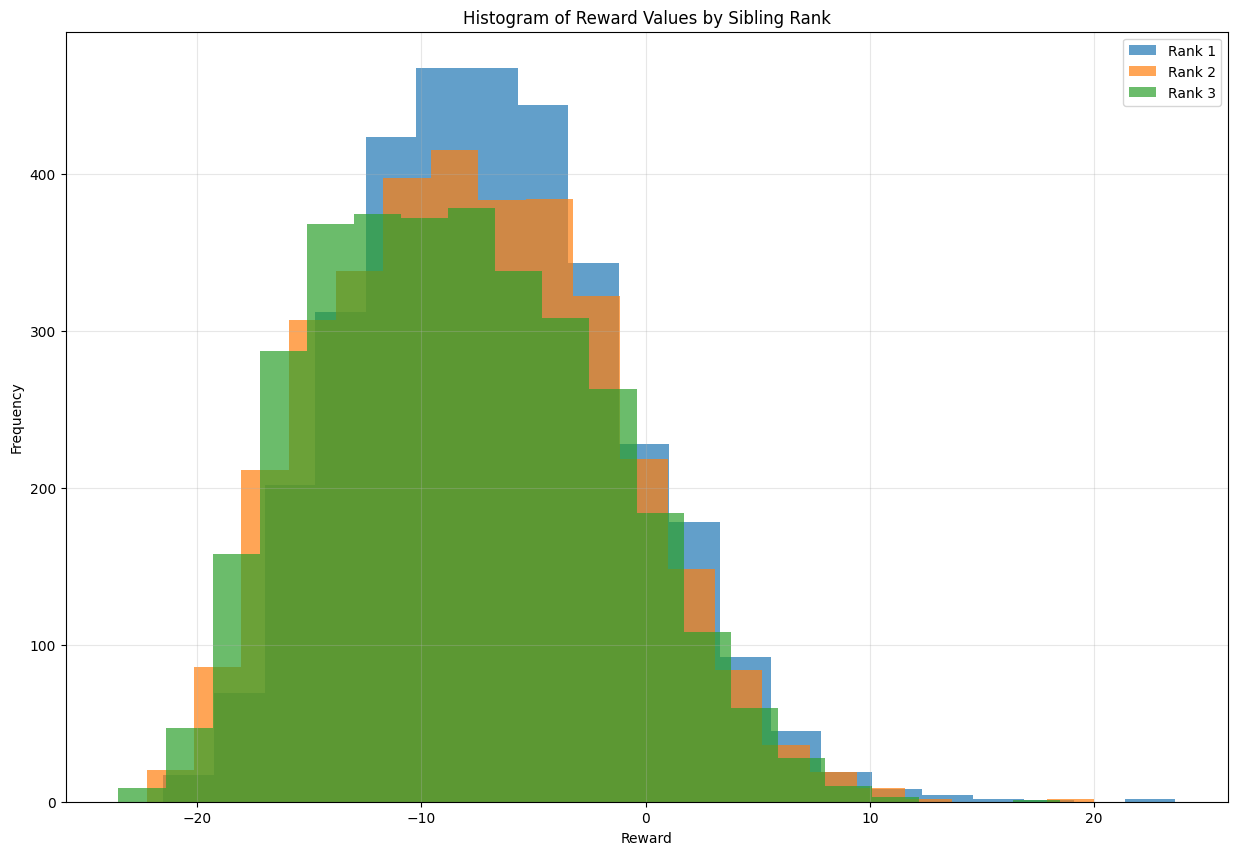

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for rank in small_sample["sibling_rank"].unique():
    subset = small_sample.filter(pl.col("sibling_rank") == rank)
    plt.hist(subset["reward"], bins=20, alpha=0.7, label=f"Rank {rank}")

plt.title("Histogram of Reward Values by Sibling Rank")
plt.xlabel("Reward")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [17]:
small_sample.group_by("sibling_rank").agg(pl.col("reward").mean().alias("avg_reward"))

sibling_rank,avg_reward
i64,f64
2,-7.650646
1,-6.827362
3,-8.285278


In [43]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
import torch
from tqdm import tqdm

model = AutoModelForSequenceClassification.from_pretrained(
    "./models/llama_32_8b_merged",
    device_map="auto",
    attn_implementation="flash_attention_2",
    torch_dtype=torch.bfloat16,
)

tokenizer = AutoTokenizer.from_pretrained("./models/llama_32_8b_merged")

pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)


def run_inference_transformers(prompts: list[str]) -> list[float]:
    results = []
    for prompt in tqdm(prompts, desc="Running inference", unit="prompt"):
        result = pipe(prompt)
        results.append(result[0]["score"])
    return results


rewards = run_inference_transformers(
    list(small_sample.select(pl.col("prompt"))["prompt"])
)

small_sample = small_sample.with_columns(
    pl.Series(name="reward_transformers", values=rewards)
)

small_sample

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Running inference: 100%|██████████| 10000/10000 [04:41<00:00, 35.56prompt/s]


id,type,by,time,title,text,url,score,parent,top_level_parent,descendants,kids,deleted,dead,siblings_count,sibling_rank,prompt,reward,reward_transformers
i64,str,str,datetime[μs],str,str,str,i64,i64,i64,i64,list[i64],bool,bool,u32,i64,str,f64,f64
7031609,"""comment""","""scott_s""",2014-01-09 17:06:13,null,"""I want to call out: <i>But som…",null,null,7030895,7030895,null,[7032706],null,null,15,1,"""<instructions>Your goal is to …",1.40625,0.796925
27805294,"""comment""","""linguae""",2021-07-11 23:14:02,null,"""From the article: “My heart wa…",null,null,27805059,27805059,null,"[27805591, 27805559, … 27814606]",null,null,9,2,"""<instructions>Your goal is to …",-1.34375,0.203075
11887072,"""comment""","""heisenbit""",2016-06-12 07:21:14,null,"""A more accurate title for the …",null,null,11883318,11883318,null,[11887675],null,null,20,2,"""<instructions>Your goal is to …",-7.71875,0.000458
24556581,"""comment""","""52-6F-62""",2020-09-22 16:34:49,null,"""I&#x27;ve been working on an i…",null,null,24555422,24554581,null,[24566115],null,null,6,2,"""<instructions>Your goal is to …",-1.75,0.156105
36376901,"""comment""","""avaer""",2023-06-18 02:55:58,null,"""I ran this for most of today i…",null,null,36376071,36376071,null,"[36377004, 36384363]",null,null,23,2,"""<instructions>Your goal is to …",-4.34375,0.011687
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
25417405,"""comment""","""roblabla""",2020-12-14 13:45:50,null,"""This project looks great! In a…",null,null,25416686,25416686,null,[25417756],null,null,7,2,"""<instructions>Your goal is to …",-12.0625,0.000006
11060714,"""comment""","""ken47""",2016-02-08 20:36:36,null,"""If you&#x27;re familiar with t…",null,null,11060655,11060556,null,[11061840],null,null,7,2,"""<instructions>Your goal is to …",-10.3125,0.000035
18737752,"""comment""","""pjc50""",2018-12-21 23:45:04,null,"""&gt; fascism is that its endga…",null,null,18735093,18731476,null,"[18738850, 18739306]",null,null,6,1,"""<instructions>Your goal is to …",-6.1875,0.001868


In [45]:
small_sample.group_by("sibling_rank").agg(
    pl.col("reward_transformers").mean().alias("avg_reward_transformers")
)

sibling_rank,avg_reward_transformers
i64,f64
1,0.39564
2,0.280092
3,0.215057


In [49]:
import math

# apply the opposite of softmax to the rewards
small_sample = small_sample.with_columns(
    pl.col("reward_transformers")
    .map_elements(lambda x: math.exp(x))
    .alias("reward_transformers_softmax")
)

small_sample

/tmp/ipykernel_384614/2149642193.py:6: PolarsInefficientMapWarning: 
Expr.map_elements is significantly slower than the native expressions API.
Only use if you absolutely CANNOT implement your logic otherwise.
Replace this expression...
  - pl.col("reward_transformers").map_elements(lambda x: ...)
with this one instead:
  + pl.col("reward_transformers").exp()

  .map_elements(lambda x: math.exp(x))
/tmp/ipykernel_384614/2149642193.py:4: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  small_sample = small_sample.with_columns(


id,type,by,time,title,text,url,score,parent,top_level_parent,descendants,kids,deleted,dead,siblings_count,sibling_rank,prompt,reward,reward_transformers,reward_transformers_softmax
i64,str,str,datetime[μs],str,str,str,i64,i64,i64,i64,list[i64],bool,bool,u32,i64,str,f64,f64,f64
7031609,"""comment""","""scott_s""",2014-01-09 17:06:13,null,"""I want to call out: <i>But som…",null,null,7030895,7030895,null,[7032706],null,null,15,1,"""<instructions>Your goal is to …",1.40625,0.796925,2.218709
27805294,"""comment""","""linguae""",2021-07-11 23:14:02,null,"""From the article: “My heart wa…",null,null,27805059,27805059,null,"[27805591, 27805559, … 27814606]",null,null,9,2,"""<instructions>Your goal is to …",-1.34375,0.203075,1.225164
11887072,"""comment""","""heisenbit""",2016-06-12 07:21:14,null,"""A more accurate title for the …",null,null,11883318,11883318,null,[11887675],null,null,20,2,"""<instructions>Your goal is to …",-7.71875,0.000458,1.000458
24556581,"""comment""","""52-6F-62""",2020-09-22 16:34:49,null,"""I&#x27;ve been working on an i…",null,null,24555422,24554581,null,[24566115],null,null,6,2,"""<instructions>Your goal is to …",-1.75,0.156105,1.168949
36376901,"""comment""","""avaer""",2023-06-18 02:55:58,null,"""I ran this for most of today i…",null,null,36376071,36376071,null,"[36377004, 36384363]",null,null,23,2,"""<instructions>Your goal is to …",-4.34375,0.011687,1.011756
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
25417405,"""comment""","""roblabla""",2020-12-14 13:45:50,null,"""This project looks great! In a…",null,null,25416686,25416686,null,[25417756],null,null,7,2,"""<instructions>Your goal is to …",-12.0625,0.000006,1.000006
11060714,"""comment""","""ken47""",2016-02-08 20:36:36,null,"""If you&#x27;re familiar with t…",null,null,11060655,11060556,null,[11061840],null,null,7,2,"""<instructions>Your goal is to …",-10.3125,0.000035,1.000035
18737752,"""comment""","""pjc50""",2018-12-21 23:45:04,null,"""&gt; fascism is that its endga…",null,null,18735093,18731476,null,"[18738850, 18739306]",null,null,6,1,"""<instructions>Your goal is to …",-6.1875,0.001868,1.001869


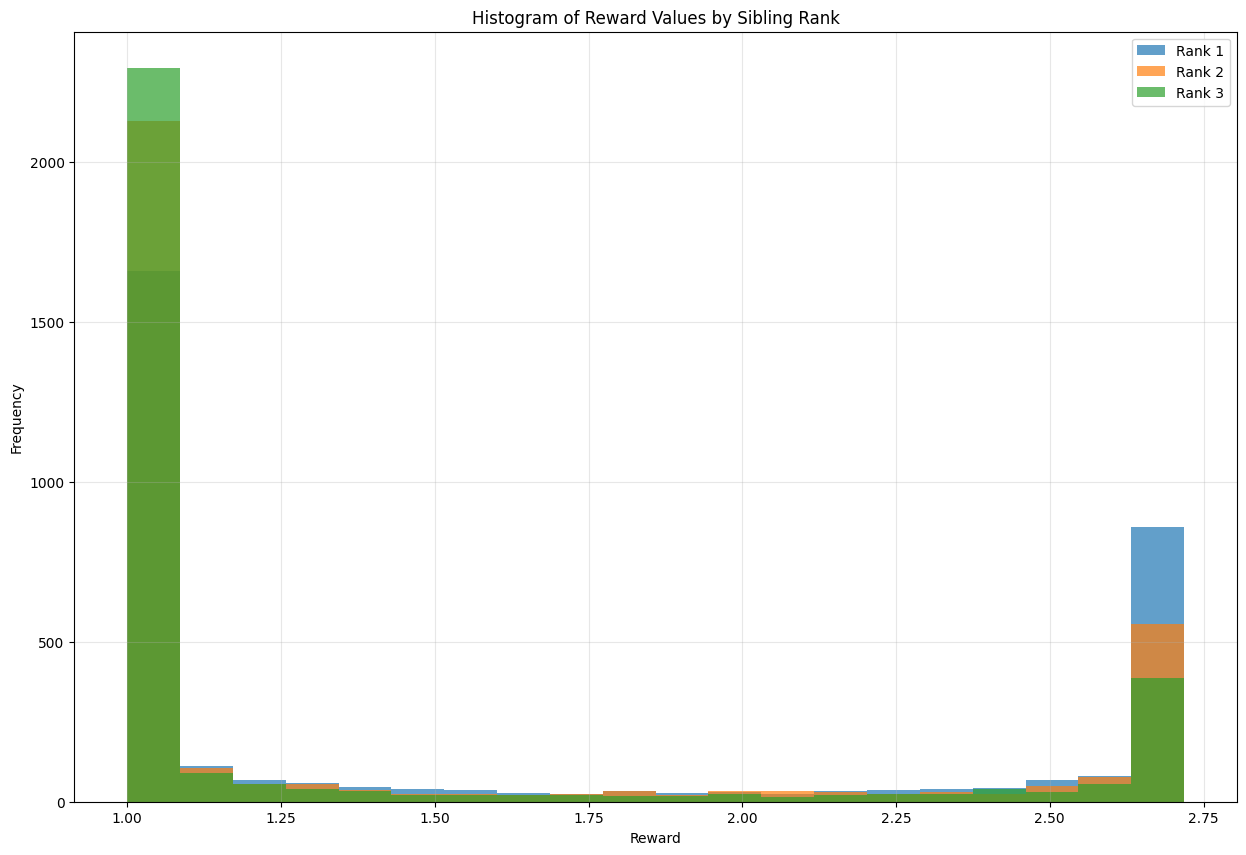

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for rank in small_sample["sibling_rank"].unique():
    subset = small_sample.filter(pl.col("sibling_rank") == rank)
    plt.hist(
        subset["reward_transformers_softmax"], bins=20, alpha=0.7, label=f"Rank {rank}"
    )

plt.title("Histogram of Reward Values by Sibling Rank")
plt.xlabel("Reward")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [1]:
small_sample

NameError: name 'small_sample' is not defined